# Movimiento del péndulo con ángulos pequeños
Los ángulos pequeños que usaremos para este movimiento se calcularon en el archivo "Ángulos Pequeños.ipynb", en este mismo directorio.

In [1]:
#Importamos las librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
import pandas as pd

#Importamos el rango de valores que consideramos pequeños
%store -r theta_peq

## Simulación Teórica

In [2]:
#Ingresamos los parámetros iniciales para la simulación
l = 1*u.m           #Longitud de la cuerda
th =11.4*u.degree     #Ángulo inicial (amplitud) del movimiento
g = 9.8*u.m/u.s**2  #Aceleración de la gravedad
m = 600*u.g         #Masa del cuerpo oscilador (la especificamos pero, al ser angulos pequeños, no la usamos)

In [3]:
def simTeoPeq (lon, ang, gra=9.8*u.m/u.s**2, per=1):
    
    """
    Esta función genera una simulación teórica del movimiento de un
    pendulo ingresandole algunos parámetros iniciales.
    
    Params:
    lon:
        Longitud de la cuerda. Debe estár en unidades de longitud.
    size:
        Entero. La longitud del lado del cuadrado que resulta de realizar
        el "zoom" a la imagen. Por defecto: la mitad del lado de la imagen
        original
    channel:
        String. Indica el canal RGB que desea visualizar. Puede ser
        "All", "R", "G", "B". Por defecto: "All"
    neg:
        Booleano. Indica si se quiere ver el negativo (True) o el
        positivo (False) de la imagen. Por defecto: False
    
    Returns:
        No hay returns, se imprime la imagen directamente.
    """
    
    if theta_peq[0]>ang.to("rad").value or ang.to("rad").value>theta_peq[-1]:
        return print("El ángulo está fuera del rango de ángulos considerados pequeños: [",
                     theta_peq[0], ",", theta_peq[-1],"] rad", sep = "")
    
    #Calculamos el periodo, teniendo encuenta que estamos en una aproximación para ángulos pequeños
    T = (2*np.pi*np.sqrt(lon/gra)).to("s")
    print("El periodo del movimiento es T:", T)
    
    #Generamos valores de tiempo entre 0 y el periodo del movimiento
    t = np.linspace(0,per*T, 100)

    #Luego, la velocidad angular para ángulos pequeños
    w = (np.sqrt(gra/lon))*u.rad
    

    #Ahora, los angulos para cada instante t de tiempo
    angs = (ang*np.cos(w*t)).to("degree")
    
    #La aceleración angular para ángulos pequeños
    a = -(gra/lon)*angs
    
    #Iniciamos la generación de los gráficos
    plt.plot(t, angs, color="purple")
    plt.xlabel(r"$Tiempo(s)$", size=13)
    plt.ylabel(r"$Posición(°)$", size=13)
    plt.title("Posición angular respecto al tiempo", size=14, fontstyle="oblique")
    plt.grid(alpha=0.5)
    plt.show()

El periodo del movimiento es T: 2.838453790227457 s


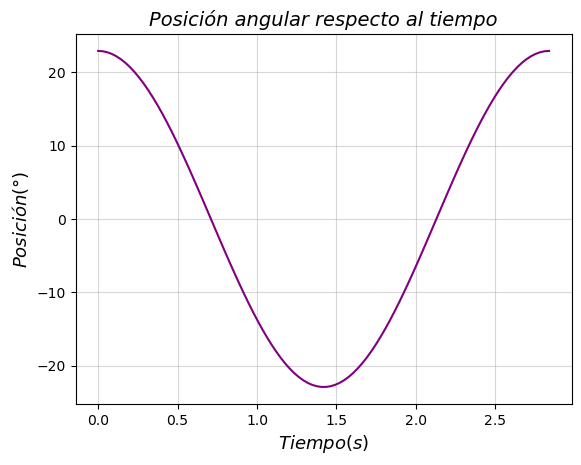

In [4]:
simTeoPeq(2*u.m,0.4*u.rad)

In [9]:
#Aceleración en función del periodo
g_x = (4*np.pi**2*l)/T**2